In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [4]:
# read the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


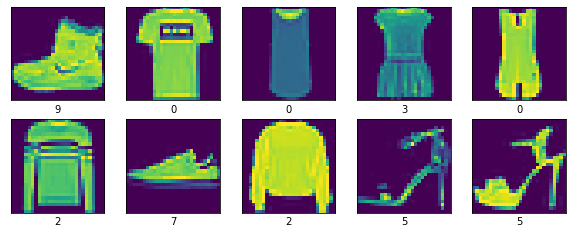

In [5]:
# visualization
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])

plt.show()

In [8]:
# nomalization
x_train = x_train / 255.0
x_test = x_test / 255

In [17]:
x_train.shape
height, width = x_train.shape[1:]
num_labels = len(np.unique(y_train))

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Build neural network
model = Sequential([
    layers.Flatten(input_shape=(height, width)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=num_labels, activation='softmax')
]) 

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
epochs = 5
history = model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8027 - accuracy: 0.7098 - val_loss: 0.5897 - val_accuracy: 0.7784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5341 - accuracy: 0.8080 - val_loss: 0.5237 - val_accuracy: 0.8129
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4762 - accuracy: 0.8312 - val_loss: 0.4916 - val_accuracy: 0.8241
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.8423 - val_loss: 0.4637 - val_accuracy: 0.8316
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4183 - accuracy: 0.8499 - val_loss: 0.4418 - val_accuracy: 0.8406


In [74]:
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.show()
accuracy = model.evaluate(x_test, y_test)
print('Accuracy', accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8406
Accuracy [0.4417940378189087, 0.8406000137329102]
